### Smart Drone Network (SDN)

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random as random
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

-----------

In [3]:
def random_ID(N):
        letters = ["A", "B", "C", "D","E",\
               "F", "G", "H", "I", "J",\
               "K", "L", "M", "N", "O",\
               "P", "Q", "R", "S", "T",\
               "U", "V", "W", "X", "Y", "Z"]
        numbers = [str(i) for i in range(10)]
        ID = ""
        for k in range(N):
            t = random.choice([0,1])
            if t == 0: ID = ID + random.choice(letters)
            else: ID = ID + random.choice(numbers)
        
        return ID

### This is Pokhara!

In [4]:
xc = 28.2096
yc = 83.9856
s = 0.1
dx = 0.001
dy = 0.001
X = np.arange(xc-s,xc+s,dx)
Y = np.arange(yc-s,yc+s,dy)
len(X),len(Y)

(201, 200)

#### Random Position

In [5]:
import random as random

LAT = []
LONG = []
G = nx.Graph()
POS = {}
k = 0
for i in range(30):
    for j in range(30):
        x = random.choice(X)
        y = random.choice(Y)
        LAT.append(x)
        LONG.append(y)
        POS.update({k:[x,y]})
        k = k+1

In [6]:
len(LAT), len(LONG)

(900, 900)

### Generate A random Network

In [7]:
G  = nx.random_geometric_graph(200, radius = 0.025 ,pos=POS, dim=2, p=2, seed=None)

In [8]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 200\nNumber of edges: 859\nAverage degree:   8.5900'

In [9]:
pos = nx.get_node_attributes(G, 'pos')

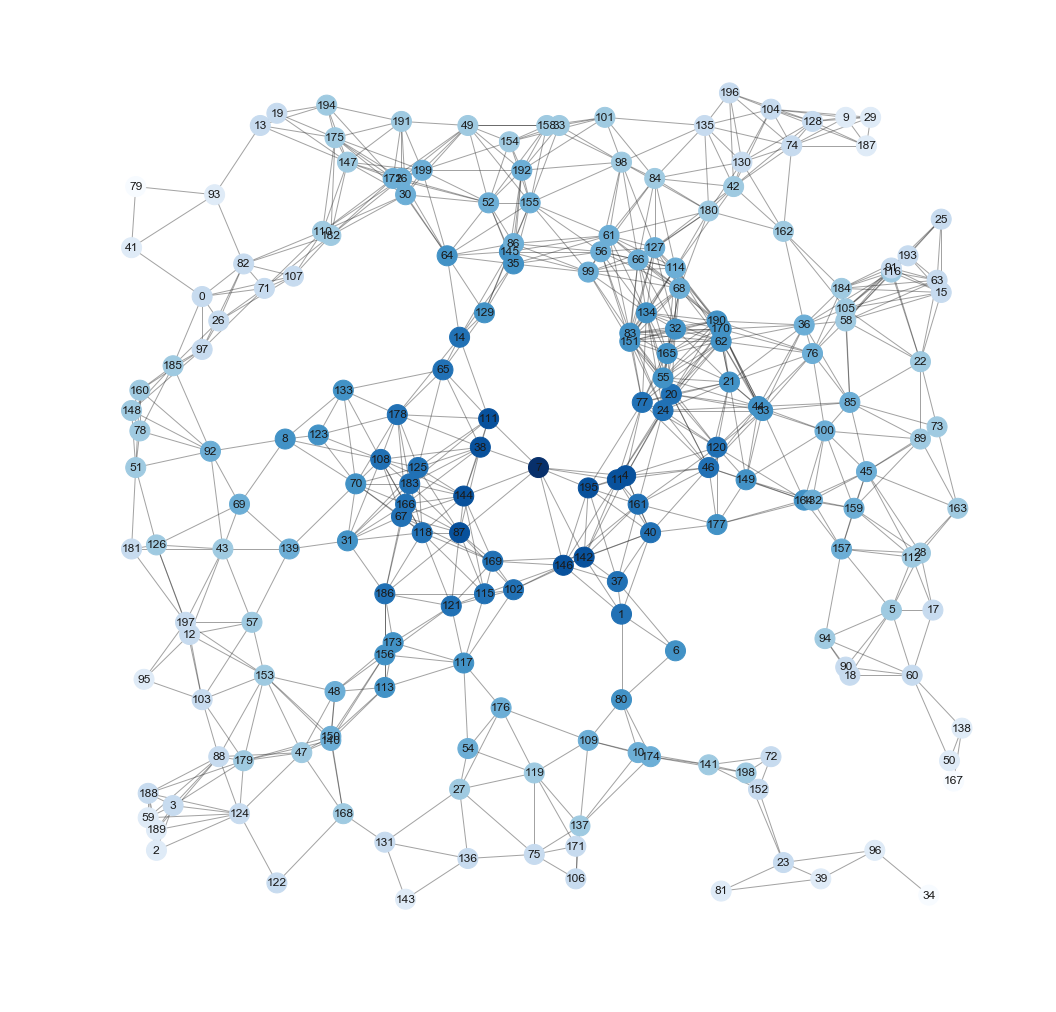

In [10]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))


plt.figure(figsize=(18, 18))
pos = POS
nx.draw_networkx_edges(G, pos,\
                       nodelist=[ncenter],\
                       alpha=0.4)

nx.draw_networkx_nodes(G, pos,\
                       nodelist=list(p.keys()),
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos,with_labels=True)

#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

### Prepare geolocation coordinates

In [11]:
LINE = []
for e in list(G.edges()):
    f = e[0]
    t = e[1]
    LINE.append({"lat":[pos[f][0],pos[t][0]],"long":[pos[f][1],pos[t][1]]})

In [12]:
LAT_node = []
LONG_node = []
for n in list(G.nodes()):
    LAT_node.append(pos[n][0])
    LONG_node.append(pos[n][1])

### Geo Location

In [13]:
# import gmplot package 
import gmplot 
  
gmap3 = gmplot.GoogleMapPlotter(xc,yc, 15) 
  
# scatter method of map object  
# scatter points on the google map 
gmap3.scatter( LAT_node,LONG_node,'red', size = 100, marker = False ) 
        
# Plot method Draw a line in 
# between given coordinates 

for item in LINE:
    gmap3.plot(item['lat'],item['long'],  
           'cornflowerblue', edge_width = 1.5) 
  

gmap3.draw( "pokhara-lattice.html" ) 

In [14]:
k = 0
for node in G.nodes():
    print(node,"|",[n for n in G.neighbors(node)])
    k = k+1
    if k>5:
        break

0 | [71, 97, 82, 41, 185, 107, 26]
1 | [40, 80, 6, 146, 37, 142]
2 | [188, 3, 59, 189, 124]
3 | [124, 88, 189, 59, 2, 179, 188]
4 | [142, 11, 24, 7, 20, 195, 161, 77, 46, 120, 40]
5 | [18, 60, 157, 94, 28, 90, 17, 112]


### Minimal Spanning Tree

In [15]:
T=nx.minimum_spanning_tree(G)

In [16]:
print(sorted(T.edges(data=True)))

[(0, 26, {}), (0, 41, {}), (0, 71, {}), (0, 82, {}), (0, 97, {}), (0, 107, {}), (0, 185, {}), (1, 6, {}), (1, 37, {}), (1, 40, {}), (1, 80, {}), (1, 142, {}), (1, 146, {}), (2, 3, {}), (2, 59, {}), (2, 124, {}), (2, 188, {}), (2, 189, {}), (3, 88, {}), (3, 179, {}), (4, 7, {}), (4, 11, {}), (4, 20, {}), (4, 24, {}), (4, 46, {}), (4, 77, {}), (4, 120, {}), (4, 142, {}), (4, 161, {}), (4, 195, {}), (5, 17, {}), (5, 18, {}), (5, 28, {}), (5, 60, {}), (5, 90, {}), (5, 94, {}), (5, 112, {}), (5, 157, {}), (7, 38, {}), (7, 87, {}), (7, 111, {}), (7, 144, {}), (8, 69, {}), (8, 70, {}), (8, 92, {}), (8, 108, {}), (8, 123, {}), (8, 133, {}), (9, 29, {}), (9, 74, {}), (9, 104, {}), (9, 128, {}), (9, 187, {}), (10, 80, {}), (10, 109, {}), (10, 137, {}), (10, 141, {}), (10, 174, {}), (12, 43, {}), (12, 57, {}), (12, 95, {}), (12, 103, {}), (12, 126, {}), (12, 153, {}), (12, 197, {}), (13, 19, {}), (13, 93, {}), (13, 147, {}), (13, 175, {}), (13, 194, {}), (14, 35, {}), (14, 64, {}), (14, 65, {}), 

(28.088648187972904, 28.330551812027338, 83.865458073747, 84.10574192625397)

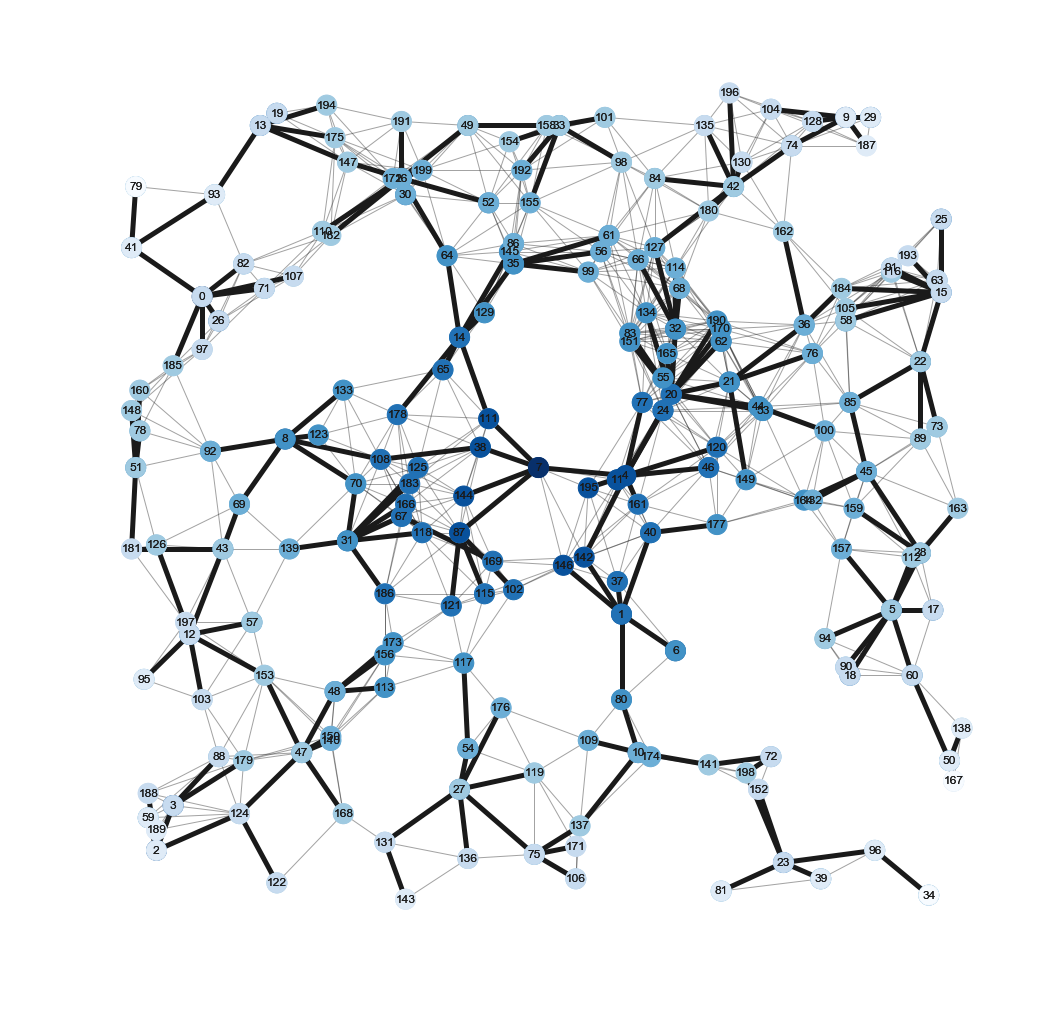

In [17]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d


plt.figure(figsize=(18, 18))
pos = POS





nx.draw_networkx_edges(T, pos,\
                       nodelist=[ncenter],\
                       width = 5.0,\
                       alpha=1.0)

nx.draw_networkx_nodes(T, pos,\
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(T,pos,with_labels=True)


'''-----------------------------------------------------'''

nx.draw_networkx_edges(G, pos,\
                       nodelist=[ncenter],\
                       alpha=0.4)

nx.draw_networkx_nodes(G, pos,\
                       nodelist=list(p.keys()),
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos,with_labels=True)




#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')

### Defth First Search

In [18]:
DFS = nx.dfs_tree(G,0)

In [19]:
print(sorted(DFS.edges(data=True)))

[(0, 71, {}), (1, 80, {}), (2, 188, {}), (3, 189, {}), (4, 11, {}), (5, 28, {}), (5, 90, {}), (7, 111, {}), (7, 146, {}), (8, 69, {}), (9, 187, {}), (10, 174, {}), (11, 20, {}), (11, 195, {}), (12, 153, {}), (13, 19, {}), (14, 65, {}), (16, 191, {}), (18, 60, {}), (20, 170, {}), (21, 149, {}), (22, 63, {}), (23, 96, {}), (23, 152, {}), (24, 151, {}), (25, 116, {}), (27, 54, {}), (27, 136, {}), (28, 112, {}), (29, 9, {}), (30, 49, {}), (31, 70, {}), (32, 77, {}), (33, 154, {}), (35, 61, {}), (36, 184, {}), (37, 6, {}), (39, 81, {}), (40, 1, {}), (42, 84, {}), (43, 12, {}), (43, 92, {}), (44, 55, {}), (45, 85, {}), (46, 164, {}), (47, 124, {}), (48, 156, {}), (49, 52, {}), (50, 138, {}), (51, 181, {}), (52, 35, {}), (53, 62, {}), (54, 117, {}), (55, 21, {}), (56, 127, {}), (57, 103, {}), (58, 36, {}), (59, 2, {}), (60, 5, {}), (60, 50, {}), (61, 180, {}), (62, 165, {}), (63, 105, {}), (64, 86, {}), (65, 178, {}), (66, 99, {}), (67, 118, {}), (68, 190, {}), (69, 139, {}), (70, 125, {}), (

(28.08859999999997, 28.330600000000267, 83.86580999999993, 84.10539000000105)

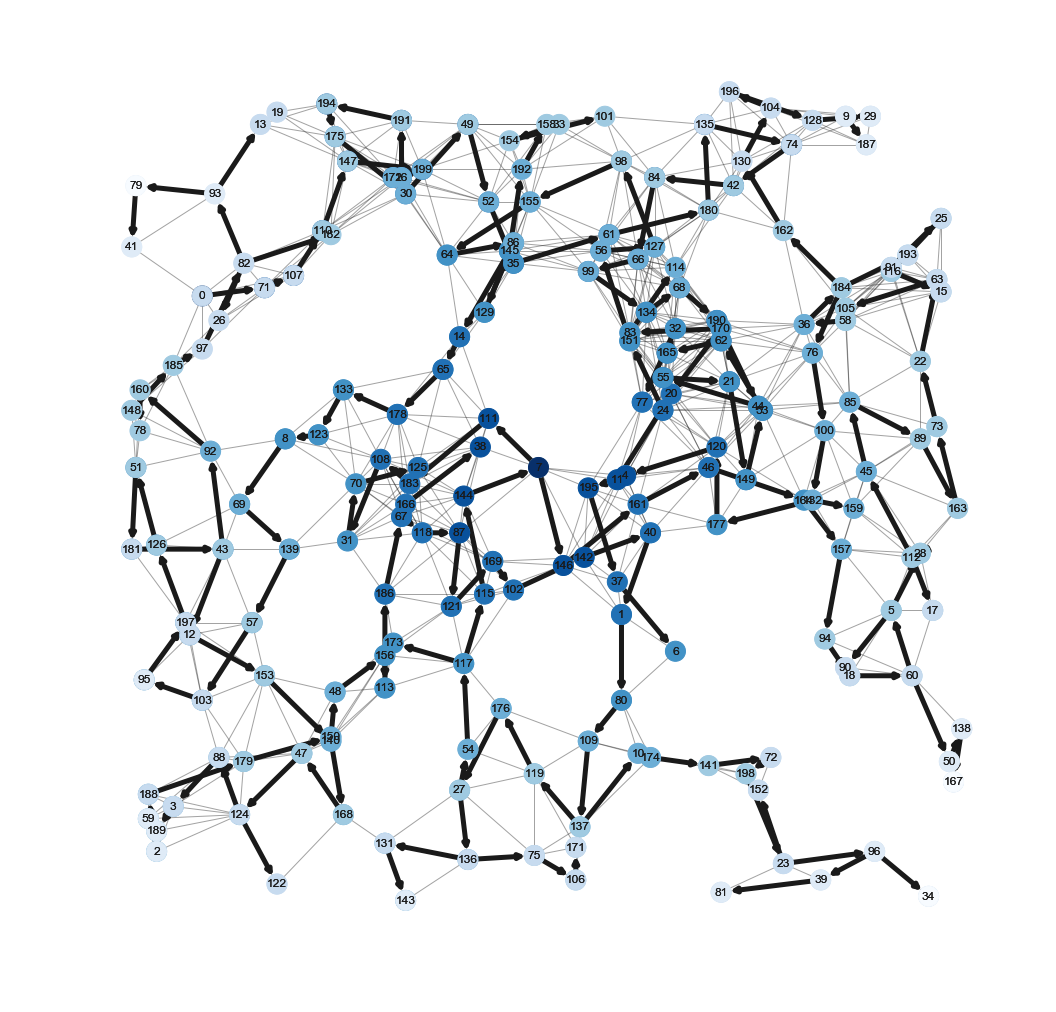

In [20]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d


plt.figure(figsize=(18, 18))
pos = POS





nx.draw_networkx_edges(DFS, pos,\
                       nodelist=[ncenter],\
                       width = 5.0,\
                       alpha=1.0)

nx.draw_networkx_nodes(DFS, pos,\
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(DFS,pos,with_labels=True)


'''-----------------------------------------------------'''

nx.draw_networkx_edges(G, pos,\
                       nodelist=[ncenter],\
                       alpha=0.4)

nx.draw_networkx_nodes(G, pos,\
                       nodelist=list(p.keys()),
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos,with_labels=True)




#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')

### Breadth First Searh

In [21]:
BFS = nx.bfs_tree(G,0)

(28.08859999999997, 28.330600000000267, 83.86580999999993, 84.10539000000105)

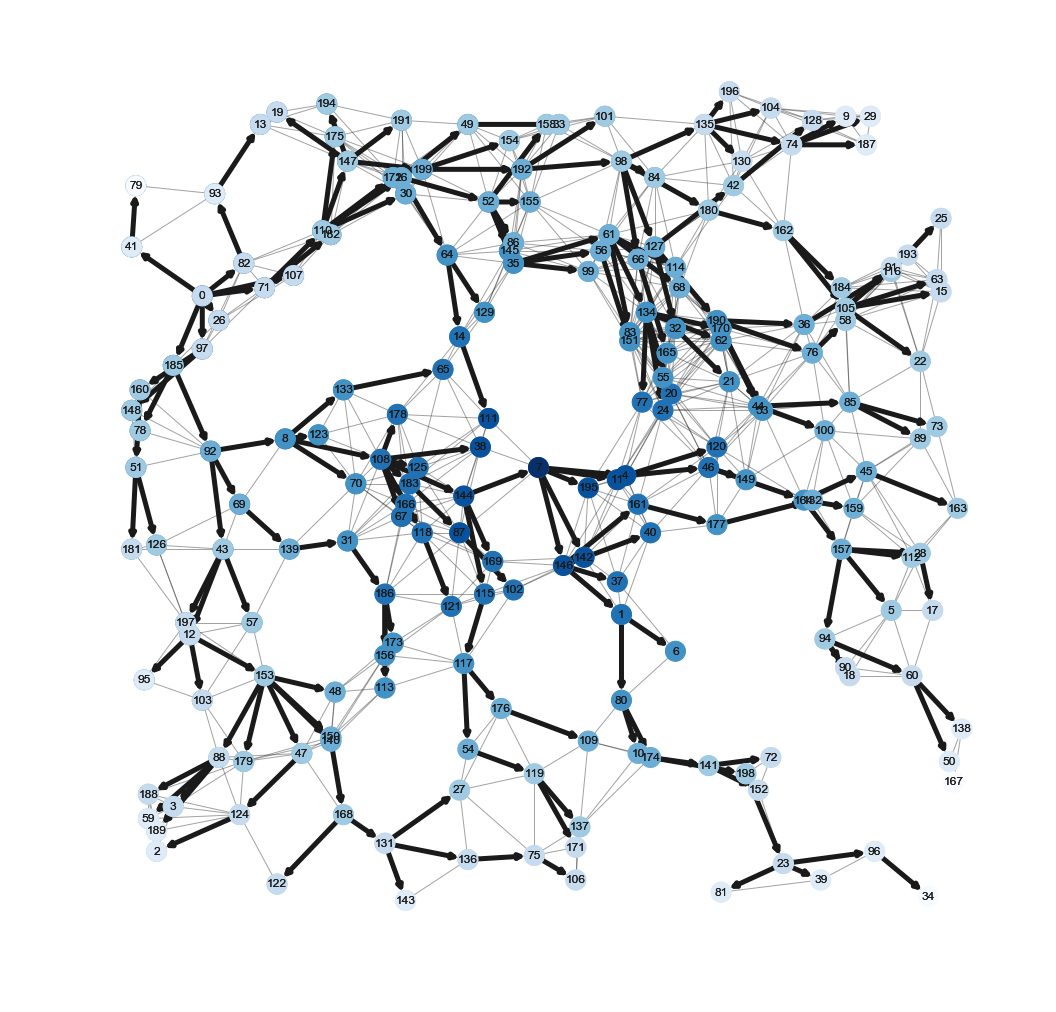

In [22]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d


plt.figure(figsize=(18, 18))
pos = POS





nx.draw_networkx_edges(BFS, pos,\
                       nodelist=[ncenter],\
                       width = 5.0,\
                       alpha=1.0)

nx.draw_networkx_nodes(BFS, pos,\
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(BFS,pos,with_labels=True)


'''-----------------------------------------------------'''

nx.draw_networkx_edges(G, pos,\
                       nodelist=[ncenter],\
                       alpha=0.4)

nx.draw_networkx_nodes(G, pos,\
                       nodelist=list(p.keys()),
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos,with_labels=True)




#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')

### The Shortest Path

In [33]:
path = nx.shortest_path(G,2,29)
path_edges1 = []
for i in range(len(path)-1):
    path_edges1.append((path[i],path[i+1]))
path_edges1

[(2, 188),
 (188, 179),
 (179, 140),
 (140, 156),
 (156, 186),
 (186, 115),
 (115, 146),
 (146, 161),
 (161, 46),
 (46, 21),
 (21, 36),
 (36, 162),
 (162, 74),
 (74, 29)]

In [34]:
path = nx.shortest_path(G,79,50)
path_edges2 = []
for i in range(len(path)-1):
    path_edges2.append((path[i],path[i+1]))
path_edges2

[(79, 93),
 (93, 13),
 (13, 175),
 (175, 199),
 (199, 192),
 (192, 98),
 (98, 127),
 (127, 190),
 (190, 53),
 (53, 164),
 (164, 157),
 (157, 5),
 (5, 60),
 (60, 50)]

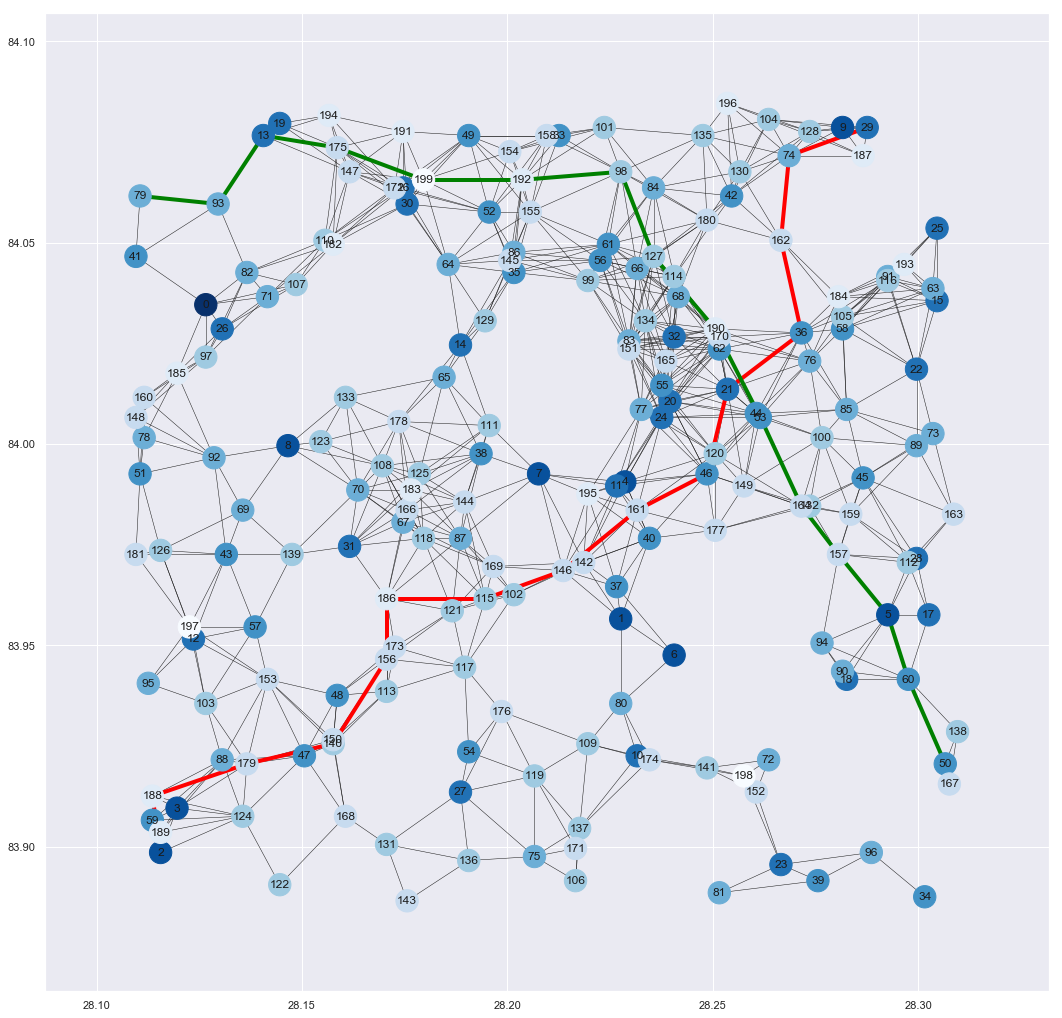

In [37]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d


plt.figure(figsize=(18, 18))
pos = POS

nx.draw_networkx_edges(G, pos,\
                       nodelist=[ncenter],\
                       width = 0.5,\
                       alpha=1.0)

nx.draw_networkx_nodes(G, pos,\
                       node_size=500,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(DFS,pos,with_labels=True)

'''--------------------------------------------------'''



nx.draw_networkx_edges(G, pos, edge_color = "red",\
                       width =4,\
                       edgelist = path_edges1)
nx.draw_networkx_edges(G, pos, edge_color = "GREEN",\
                       width =4,\
                       edgelist = path_edges2)

### Project Shortest Path

- **Generate random graph over Kathmandu with 200 nodes**. 
- **Find the Minimal Spanning Tree**. 
- **Find the shoetest Path between two nodes below and color them with different colors.** 
    - (1) 41, 179 
    - (2) 1, 49
    - (3) 21, 150 
- **Calculate the total cost of the path based on the number of edges**.